#Cassification of stars, galaxies and quasars


Importamos librerías

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import io

In [3]:
uploaded = files.upload()

Saving star_classification.csv to star_classification.csv


In [5]:
df = pd.read_csv(io.StringIO(uploaded['star_classification.csv'].decode('utf-8')))

EDA

In [10]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
print(df.groupby('class').size())

class
GALAXY    59445
QSO       18961
STAR      21594
dtype: int64


<BarContainer object of 18 artists>

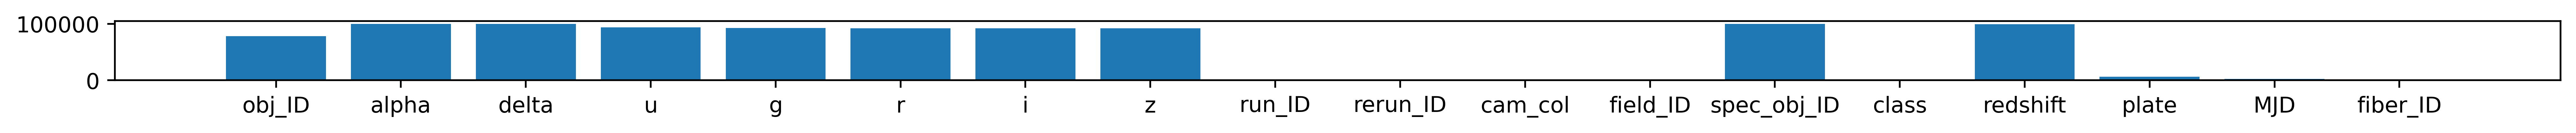

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,0.5),dpi=500)
plt.bar(df.columns,df.nunique())

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [15]:
df_2=df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','plate','MJD','fiber_ID'],axis=1)
df_2.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


<BarContainer object of 9 artists>

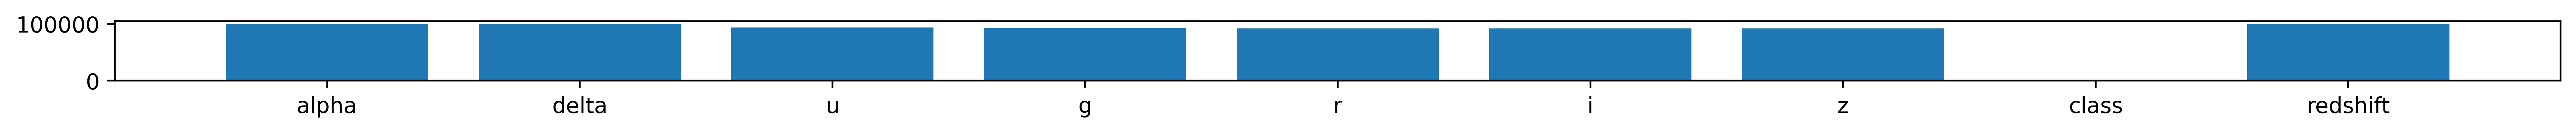

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,0.5),dpi=500)
plt.bar(df_2.columns,df_2.nunique())

##Cleaning data

In [22]:
for col in df_2.columns:
    print(col)

alpha
delta
u
g
r
i
z
class
redshift


In [23]:
df_2.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

[Text(0, 0.5, 'Type of Object'), Text(0.5, 0, 'Redshift')]

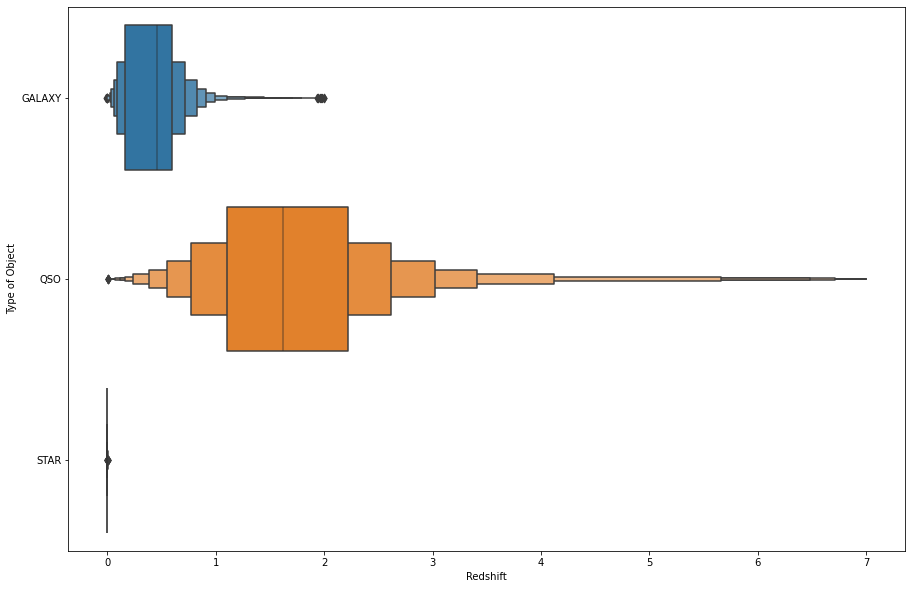

In [24]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="redshift",y="class",data=df_2).set(xlabel='Redshift',ylabel='Type of Object')

[Text(0, 0.5, 'Type of Object'), Text(0.5, 0, 'Near Infrared filter')]

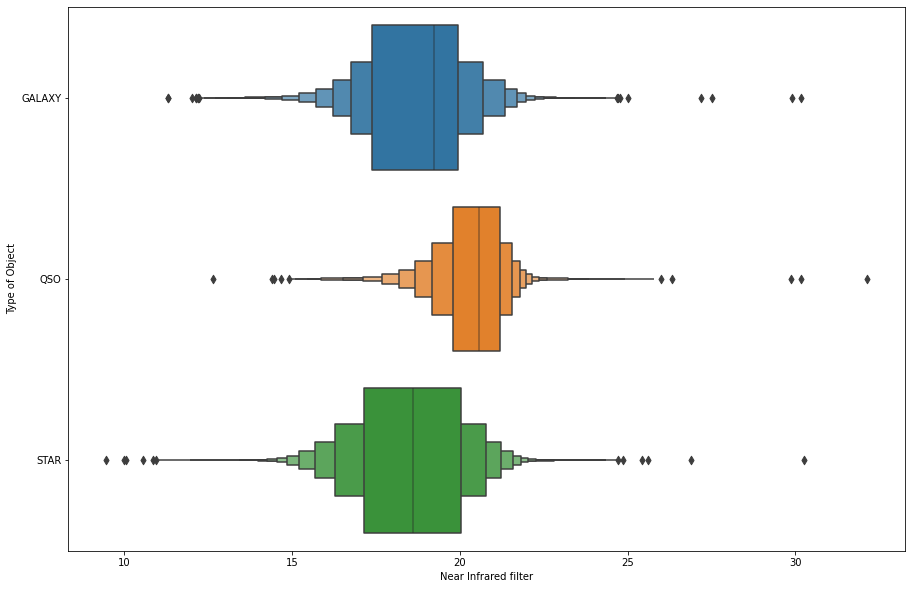

In [25]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="i",y="class",data=df_2).set(xlabel='Near Infrared filter',ylabel='Type of Object')

In [26]:
x= df_2.drop(['class'],axis=1)
x.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


In [27]:
y= df_2[['class']]
y.head()

,class
0,GALAXY
1,GALAXY
2,GALAXY
3,GALAXY
4,GALAXY


##Preparing and evaluating the data for the model

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
x_train.head()

,alpha,delta,u,g,r,i,z,redshift
31152,182.634837,39.626517,21.08952,21.06453,20.85715,20.95956,20.61033,1.036468
33499,215.771078,15.074450,19.52671,19.49507,19.54840,19.31133,19.35584,1.872981
18594,117.481295,33.523910,20.71835,18.80559,17.76449,17.30837,16.92365,0.120712
97132,241.696805,54.335655,25.45814,21.63161,20.28455,19.57242,19.02991,0.556022
56015,154.721590,45.764829,25.89776,21.68266,19.82590,19.24631,18.67415,0.387010


In [30]:
y_train.head()

,class
31152,QSO
33499,QSO
18594,GALAXY
97132,GALAXY
56015,GALAXY


##Model

In [34]:
model=LogisticRegression(max_iter=500000)
model.fit(x_train,np.ravel(y_train,order='C'))

LogisticRegression(max_iter=500000)

Text(69.0, 0.5, 'Truth')

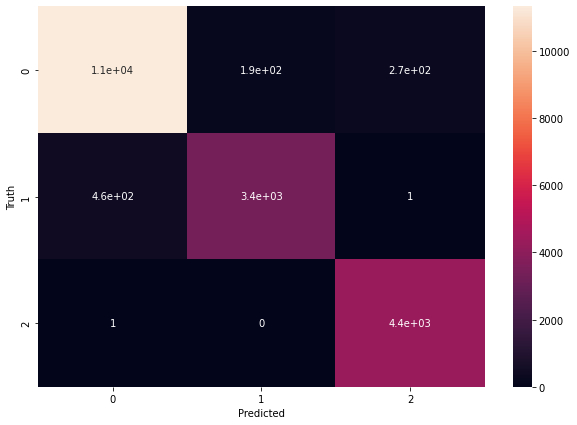

In [35]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
accuracy=(model.score(x_test,y_test))*100
print('Model Accuracy:', accuracy)

Model Accuracy: 95.38499999999999
